In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier

In [35]:
#Read dataset
df = pd.read_csv("diabetes.csv")

#Display the first 10 rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset terdiri dari 9 kolom dan 768 baris.
Dimana setiap data dalam variabel berjumlah sama, maka semua data balance.

In [37]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Variabel dalam dataset bertipe integer dan float, tidak ada variabel tipe kategorikal.

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Persebaran data terlihat cukup baik. Tidak ada data dalam range yang sangat jauh.

In [39]:
#Chech missing value(s)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tidak terdapat missing value pada setiap variabel dalam dataset.

In [41]:
#Change '0' value in the dataset into missing value
df_new = df.copy(deep = True)
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Pada pengecekkan missing value sebelumnya, tidak terdeteksi adanya missing value pada dataset.

Namun, pada dataset ini banyak terdapat value bernilai '0' yang seharusnya dikategorikan sebagai missing value. Maka, semua value '0' diganti dengan np.Nan agar '0' dapat terdeteksi sebagai missing value.

In [42]:
#Re-check the missing value(s)
df_new.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Setelah dilakukan pengecekkan ulang missing value setelah perubahan value '0' menjadi missing value, terlihat terdapat beberapa missing values pada 5 variabel dalam dataset.

Missing values terbanyak terdapat pada variabel 'Insulin' dimana terdapat 374 values.

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

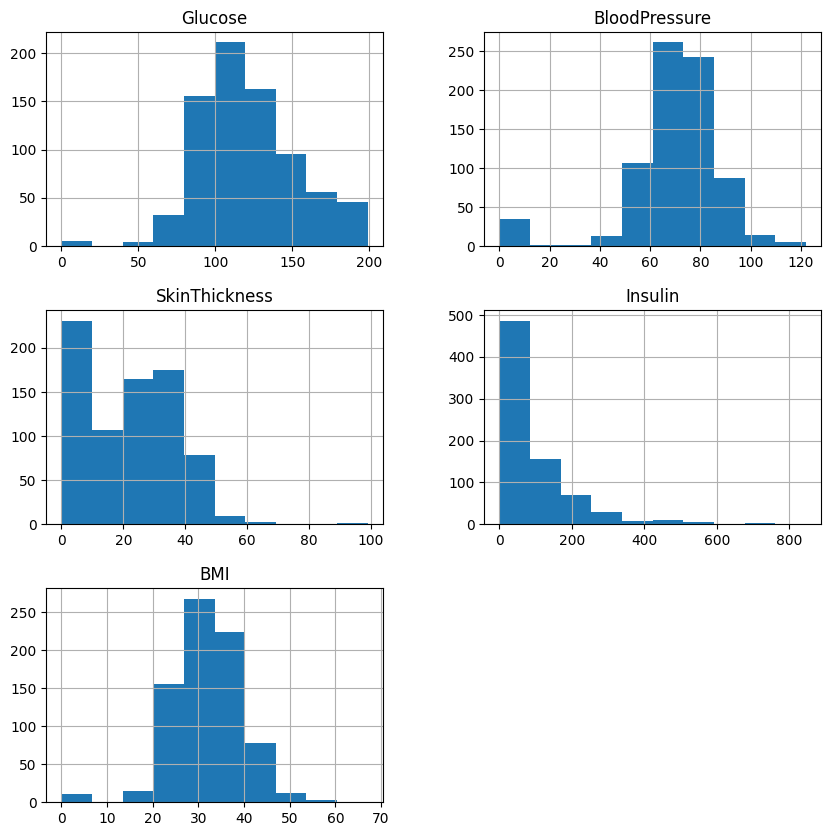

In [43]:
#Plotting the variables that have missing values

var = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

var.hist(figsize = (10,10))

In [44]:
#Fill the missing value(s) with mean or median
df_new['Glucose'].fillna(df_new['Glucose'].mean(), inplace = True)
df_new['BloodPressure'].fillna(df_new['BloodPressure'].mean(), inplace = True)
df_new['SkinThickness'].fillna(df_new['SkinThickness'].median(), inplace = True)
df_new['Insulin'].fillna(df_new['Insulin'].median(), inplace = True)
df_new['BMI'].fillna(df_new['BMI'].median(), inplace = True)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

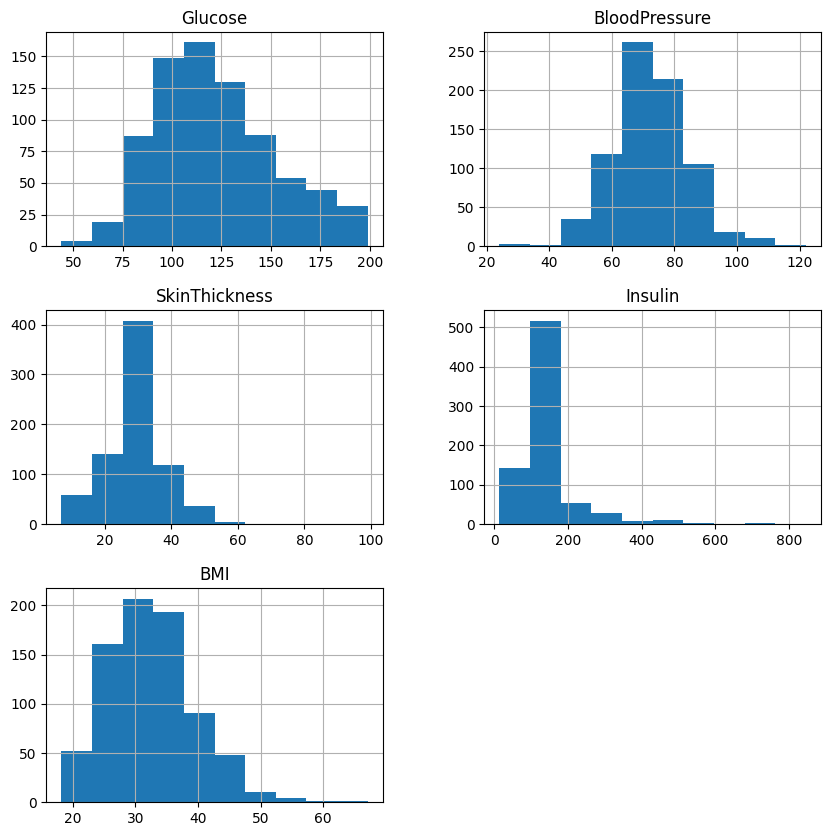

In [45]:
#Plotting after filled the missing values

var_new = df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

var_new.hist(figsize = (10,10))

Setelah mengganti missing value dengan nilai mean atau median setiap variabelnya, terlihat pada plot tidak lagi ada bagian yang kosong atau missing valuenya.

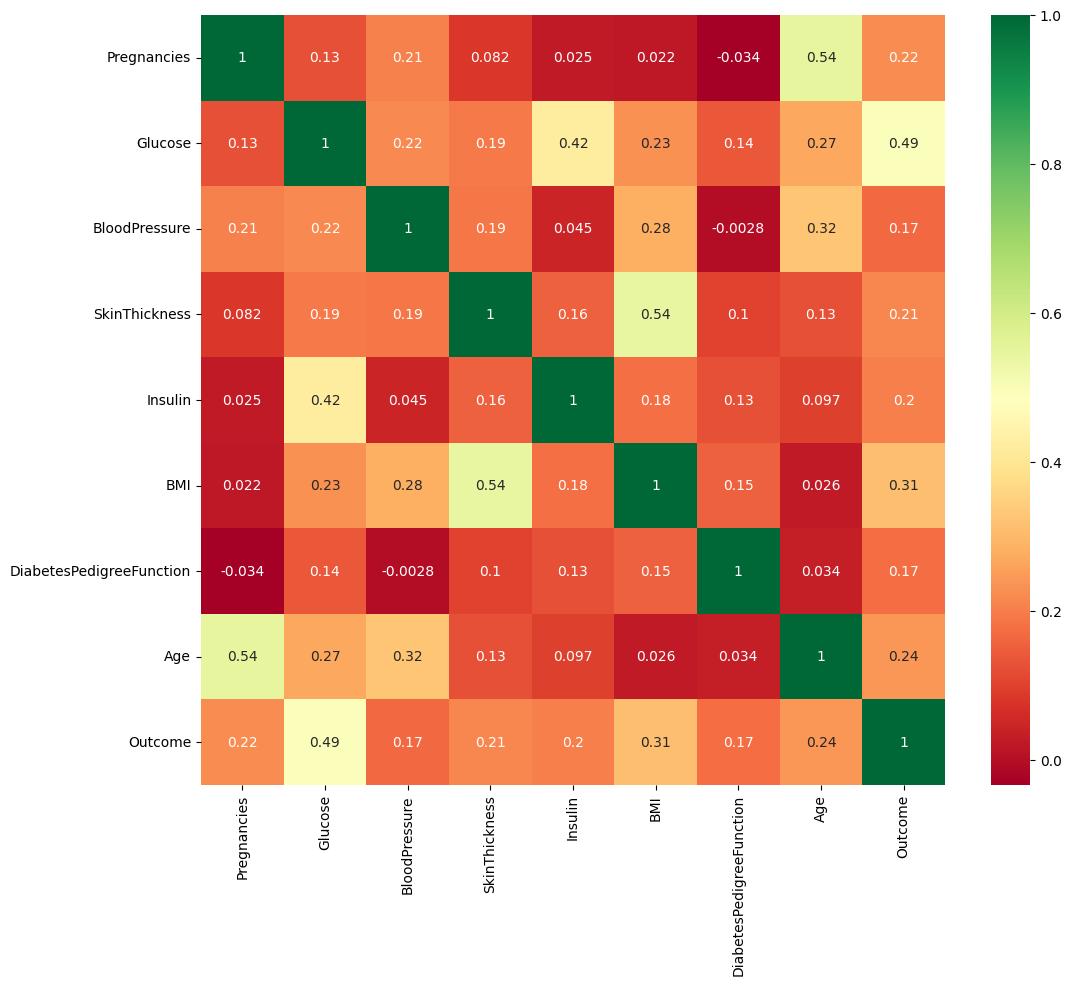

In [46]:
#Check the correlation
plt.figure(figsize=(12,10))
p = sn.heatmap(df_new.corr(), annot=True, cmap ='RdYlGn')

Pada plot korelasi di atas, terlihat bahwa variabel 'Glucose', 'BMI', 'Age', dan 'Pregnancies' memiliki korelasi yang tinggi dengan variabel 'Outcome' yang merupakan variabel target.

Maka dari itu, keempat variabel tersebut merupakan faktor yang paling berpengaruh dalam terjangkitnya seseorang akan penyakit Diabetes.

In [47]:
#Display the first 5 rows in the new dataset
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [50]:
#Define new function for checking the outlier(s)
def find_out(df_new):
  Q1 = df_new.quantile(0.25)
  Q3 = df_new.quantile(0.75)
  IQR = Q3 - Q1
  outliers = df_new[((df_new<(Q1-1.5*IQR)) | (df_new>(Q3+1.5*IQR)))]
  return outliers

In [51]:
outliers = find_out(df_new['Outcome'])

print("Number of Outliers: " + str(len(outliers)))

Number of Outliers: 0


Hasil pengecekkan outlier menggunakan rumus Q1, Q3, dan IQR menunjukkan bahwa tidak terdapat outlier dalam dataset. Maka, tidak perlu ada penghapusan outlier.

In [55]:
#Seperate data into X and y variable
StdScaler = StandardScaler()
X = pd.DataFrame(StdScaler.fit_transform(df_new.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [56]:
#y variabel is the target variable
y = df_new.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [57]:
#Splitting data into train and test (train 70%, test 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#Modelling

##K-Nearest Neighbor (KNN)

In [61]:
#Make KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
#Model predict
knn_pred = knn.predict(X_test)

In [66]:
#Model evaluation
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       144
           1       0.69      0.55      0.61        87

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



Pada permodelan menggunakan KNN, model dapat memprediksi dari seluruh pasien yang benar menderita diabetes sebanyak 69%.

Namun, model dapat memprediksi dengan benar pasien menderita diabetes sebanyak 55% dengan 87 pasien.

Berdasarkan hasil tersebut, model dikatakan belum cukup baik dalam memprediksi.

##Decision Tree

In [67]:
#Make DT model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
#Model predict
dt_pred = dt.predict(X_test)

In [69]:
#Model evaluation
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       144
           1       0.66      0.55      0.60        87

    accuracy                           0.72       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



Pada permodelan menggunakan Desicion Tree, model dapat memprediksi dari seluruh pasien yang benar menderita diabetes sebanyak 66%.

Namun, model dapat memprediksi dengan benar pasien menderita diabetes sebanyak 55% dengan 87 pasien.

Berdasarkan hasil tersebut, model dikatakan belum cukup baik dan masih berada di bawah prediksi menggunakan KNN.

##Support Vector Machine (SVM)

In [70]:
#Make SVM model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [71]:
#Model predict
svm_pred = svm.predict(X_test)

In [72]:
#Model evaluation
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       144
           1       0.75      0.47      0.58        87

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.69       231
weighted avg       0.74      0.74      0.72       231



Pada permodelan menggunakan Support Vector Machine, model dapat memprediksi dari seluruh pasien yang benar menderita diabetes sebanyak 75%.

Namun, model dapat memprediksi dengan benar pasien menderita diabetes sebanyak 47% dari 87 pasien.

Berdasarkan hasil tersebut, model dikatakan tidak baik karena tingkat recallnya rendah, dimana seharusnya untuk kasus kesehatan, tingkat recallnya seharusnya bernilai tinggi.

##Voting Classifier

In [74]:
#Make voting classifier model
estimators = [('SVM', svm), ('KNN', knn), ('DesicisionTree', dt)]

ensemble = VotingClassifier(estimators, voting='hard')
ensemble_model = ensemble.fit(X_train, y_train)

In [75]:
#Model predict
ensemble_pred = ensemble.predict(X_test)

In [77]:
#Model evaluation
print(classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       144
           1       0.76      0.52      0.62        87

    accuracy                           0.76       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



Pada permodelan menggunakan Voting Classifier, model dapat memprediksi dari seluruh pasien yang benar menderita diabetes sebanyak 76%.

Namun, model dapat memprediksi dengan benar pasien menderita diabetes sebanyak 52% dari 87 pasien.

Berdasarkan hasil tersebut, model dikatakan tidak baik karena tingkat recallnya rendah, dimana seharusnya untuk kasus kesehatan, tingkat recallnya seharusnya tinggi.

Model menggunakan voting classifier menghasilkan model mirip seperti menggunakan SVM dimana tingkat presisinya cukup baik, namun recallnya rendah sehingga tidak disarankan dalam kasus kesehatan.

##Random Forest

In [78]:
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

In [79]:
#Make Random Forest model
rf = RandomForestClassifier()

gs_rf = GridSearchCV(rf, cv=10, param_grid=param_dist, n_jobs=3)

In [80]:
#Search the best parameters using Grid Search
rf_model = gs_rf.fit(X_train, y_train)
print('Best Parameters using Grid Search: \n', gs_rf.best_params_)

Best Parameters using Grid Search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}


In [81]:
end = time.time()
print('Time taken in Grid Search: {0: .2f}'.format(end - start))

Time taken in Grid Search:  118.26


In [83]:
#Model predict
rf_pred = gs_rf.predict(X_test)

In [84]:
#Model evaluation
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       144
           1       0.77      0.41      0.54        87

    accuracy                           0.73       231
   macro avg       0.74      0.67      0.67       231
weighted avg       0.74      0.73      0.71       231



Pada permodelan menggunakan Random Forest, model dapat memprediksi dari seluruh pasien yang benar menderita diabetes sebanyak 77%.

Namun, model dapat memprediksi dengan benar pasien menderita diabetes sebanyak 41% dari 87 pasien.

Berdasarkan hasil tersebut, model juga dikatakan tidak baik seperti dua model sebelumnya, SVM dan voting classifier karena tingkat recallnya rendah, dimana seharusnya untuk kasus kesehatan, tingkat recallnya seharusnya bernilai tinggi.

##Boosting Clasifier

In [86]:
#Make boosting classifier model
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

AdaBoostClassifier()

In [87]:
#Model predict
ab_pred = ab.predict(X_test)

In [88]:
#Model evaluation
print(classification_report(y_test, ab_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       144
           1       0.67      0.57      0.62        87

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.73      0.73       231



Pada permodelan menggunakan Ada Boost, model dapat memprediksi dari seluruh pasien yang benar menderita diabetes sebanyak 67%.

Namun, model dapat memprediksi dengan benar pasien menderita diabetes sebanyak 57% dari 87 pasien.

Berdasarkan hasil tersebut, model masih dikatakan kurang baik dalam memprediksi.

#Conclusion

Berdasarkan 6 jenis permodelan yang telah dilakukan di atas, tidak ada model yang dapat memprediksi dengan benar pasien menderita diabetes lebih dari 60%.

Namun, model yang memiliki nilai recall paling tinggi daripada model-model lainnya yaitu permodelan dengan menggunakan **Ada Boost (Boosting Classifier)**, dimana tingkat precision sebesar 67% dan tingkat recallnya sebesar 57%.